# Text Extraction

## 1 - Libary Imports

In [2]:
%reset -f

# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")
MODEL_DIR = os.path.join(ROOT_DIR, "model")

# Import own functions
from libraries import corpus
from libraries import pdf2text

##########################
# Import other libraries
##########################

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
from matplotlib import pyplot
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt

# Tokenizer
from keras.preprocessing.text import Tokenizer

# Gensim for Word2Vec
from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus
from gensim.summarization import summarize

# Natural Language Processing libraries
import nltk 
from nltk.tokenize import word_tokenize

import spacy
from spacy import displacy
from spacy.lang.en import English
from collections import Counter

# Machine Learning libraries
from sklearn.decomposition import PCA

from importlib import reload
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## 2 - Data Preprocessing

In [3]:
# Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

In [4]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

Cleaning: #metahash


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: metal
Cleaning: metaver

## 3 - Methods Application

### Spacy - Entity Detection

In this case, we will use Named-entity recognition (NER) to extract insights from the White Papers

In [5]:
# Define Function
def entity_det (paper, corpora):
    """
    Function that receives the name of a paper, and retrieves a plot with the most common entities found
    Input:
        Name of a white paper in the corpus
    Output:
        Plot
    """
    
    assert paper in corpora.keys()
    
    # Load the NLP object with pre-trained data
    nlp = spacy.load('en_core_web_sm')
    
    # Create an object of the paper chosen
    doc1 = nlp(corpora[paper])
    
    # Create an object of a predefined white paper (for comparison)
    #doc2 = nlp(dataset['bitcoin'])
    
    # Get all the entities gather from the documents
    items1 = [x.label_ for x in doc1.ents]
    #items2 = [x.label_ for x in doc2.ents]
    
    # Get the most common entities found in the paper
    i1 = Counter(items1).most_common(10)
    #i2 = Counter(items2).most_common(10)

    # Pepare the arrays for the plot
    x1 = []
    y1 = []

    #x2 = []
    #y2 = []

    # Iterate through the entities and add them into the array
    for i in range(len(i1)):
        x1.append(i1[i][0])
        y1.append(i1[i][1])

    #for i in range(len(i2)):
        #x2.append(i2[i][0])
        #y2.append(i2[i][1])
    
    # Create the visualization
    plt.subplots_adjust(hspace = 0.5, top = 0.4)
    plt.figure(figsize=(12,5))

    plt.subplot(211)
    plt.plot(x1, y1)
    plt.title(paper)

    #plt.subplot(212)
  #  plt.figure(figsize=(12,5))
    #plt.plot(x2, y2)
    #plt.title("Bitcoin")
    #plt.show()

### Word2Vec

Using vectorizers to get similar words inside a White Paper

In [6]:
# Prepare the array with the tokens
tokens = []

# Iterate through all the papers and get all the different words within the papers
for k in corpora.keys():
    tokens.append(word_tokenize(corpora[k]))
    
# Create Model
#model = Word2Vec(tokens[:], size =100, window=5, min_count=1, workers=4)

# Save Model
#model.save("model_word2vec_textextraction.model")

# Load Model

model = Word2Vec.load("model_word2vec_textextraction.model")


In [63]:
# Define the function
def wordvec(topic, protocol,corpora, model1):
    """
    Function that receives a word and the name of a paper, and returns a visualization with similar words
    Input:
        Specific topic
        Name of the protocol
        Corpora with all the texts
        Word2Vec Model with all the Vectors
    Output:
        Plots
    """
    assert protocol in corpora.keys()
    
    # Iterate through the the protocols to get the position of the protocol
    n = 0    
    for i in enumerate(corpora.items()):
        if i[1][0] == protocol:
            n = i[0]
        else: continue
            
    # Create an empty Word2Vec object where we will put the weights for the specific protocol, based on the whole corpus
    model_test = Word2Vec()
    
    # Prepare the array with the tokens
    tokens = []

    # Tokenize white paper
    tokens.append(word_tokenize(corpora[protocol]))

    # Iterate through all the words in the specific white paper, and add the weights into the new model
    for word in tokens[0]:
        if word in model1.wv.vocab:
            model_test.wv[word] = model1.wv[word]

    # Get most similar word, based on the whole corpus
    l = model_test.wv.most_similar([topic])
    
    # Prepare the arrays for the visualizations
    x = []
    y = []

    # Iterate through the similar words
    for i in range(len(l)):
        x.append(l[i][0])
        y.append(l[i][1])

    # Prepare Visualization
    #grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    #plt.subplot(grid[0, 0])   
    plt.bar(x, y)
    plt.xticks(rotation=90)
    plt.show()
    
    # Prepare the array with the tokens
    tokens = []

    # Iterate through all the papers and get all the different words within the papers
    for k in corpora.keys():
        tokens.append(word_tokenize(corpora[k]))
    
    # Model with only words in the exact protocol
    model2 = Word2Vec(tokens[n], size =100, window=5, min_count=1, workers=2)

    # Get the similar words within the exact protocol
    X = model2[model2.wv.vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    # Prepare Visualization
    #plt.subplot(grid[1, 0])
    plt.figure(figsize=(10,10))
    
    plt.scatter(result[:,0], result[:,1], s=100)
    words = list(model2.wv.vocab)

    for i, word in enumerate(tokens[n][:]):
        try:
            plt.annotate(word, xy=(result[i,0], result[i,1]), size = 10)
        except:
            pass
        
    plt.show()

### Text Summarization

Use Text Summarization to get a summary of the protocol

In [79]:
# Define function
def summ(protocol, corpora):
    """
    Function that receives the name of a Protocol and returns the text summary
    Input:
        Name of protocol
    Output:
        Summary
    """
    assert protocol in corpora.keys()
    text = corpora[protocol]
    print(summarize(text))

## 4 - Outcome

### Input

In [9]:
test = pdf2text.get_dataset(path=TEST_DIR)

In [10]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

Cleaning: adcoin
Cleaning: budbo


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [72]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test_sent = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...


Cleaning: adcoin


[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


In [11]:
# Join the Training dataset with the Test Dataset
all_corpora = {**corpora, **corpora_test}

### Methods + Output

<Figure size 432x288 with 0 Axes>

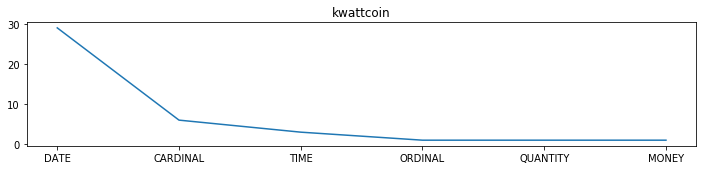

In [12]:
#put the name of the white paper here
entity_det('kwattcoin',all_corpora)

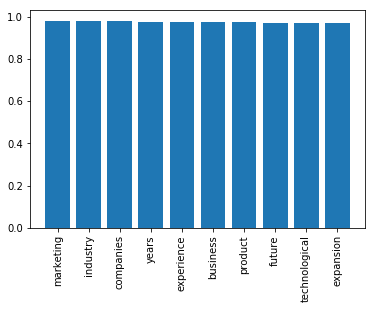

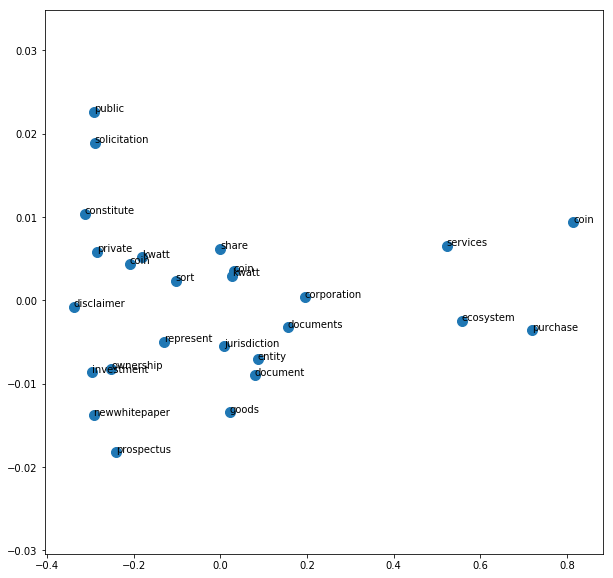

In [67]:
#1st input - word, for which you want to find some similarities
#2nd input - chosen whitepaper to see the most closest (similar) words in this whitepaper
wordvec("roadmap", "kwattcoin",all_corpora, model)

In [80]:
#put the name of the protocol here to see the summarized version of whitepaper
summ("oceanprotocol",test)

A Decentralized Substrate for AI Data & Services 
Ocean is a decentralized protocol and network of artificial 
intelligence (AI) data/services.
It helps power marketplaces to buy/sell AI data & services, software to publish 
orchestration: at its core are decentralized service agreements and decentralized access control, 
On that, Ocean adds network rewards to incentivize data sharing, 
including privacy-preserving data commons.
This Technical Whitepaper is intended to accompany the Information Memorandum for the Token Distribution Details published by 
Our aim is to spread the benefits of AI by equalizing the opportunity to access data.
can be used as a foundational substrate to power a new ecosystem of data marketplaces, and more 
Can it reward relevant data over spam?
To answer the first two questions above, Ocean has functionality to reconcile spread of data with 
It has infrastructure for service agreements and access control, which 
allows compute to be brought to the data.
It ha

by limiting access to a single dataset to 10 parties over 
